# Clustering and Dimensionality Reduction Exam
Welcome to the weekly project on clustering and dimensionality reduction. You will be working with a dataset of traffic accidents.

## Dataset
The dataset that will be used in this task is `Traffic_Accidents.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
The dataset contains information about traffic accidents, including location, weather conditions, road conditions, and more. Below are sample of these columns:

* `Location_Easting_OSGR`: Easting coordinate of the accident location.
* `Location_Northing_OSGR`: Northing coordinate of the accident location.
* `Longitude`: Longitude of the accident site.
* `Latitude`: Latitude of the accident site.
* `Police_Force`: Identifier for the police force involved.
* `Accident_Severity`: Severity of the accident.
* `Number_of_Vehicles`: Number of vehicles involved in the accident.
* `Number_of_Casualties`: Number of casualties in the accident.
* `Date`: Date of the accident.
* `Day_of_Week`: Day of the week when the accident occurred.
* `Speed_limit`: Speed limit in the area where the accident occurred.
* `Weather_Conditions`: Weather conditions at the time of the accident.
* `Road_Surface_Conditions`: Condition of the road surface during the accident.
* `Urban_or_Rural_Area`: Whether the accident occurred in an urban or rural area.
* `Year`: Year when the accident was recorded.
* Additional attributes related to road type, pedestrian crossing, light conditions, etc.

## Goal
The primary goal is to analyze the accidents based on their geographical location.


## Import Libraries

In [374]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

## Load the Data

In [375]:
df = pd.read_csv('Traffic_Accidents.csv')

## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [376]:
df.head()

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,88245,2.01E+12,381880.0,298700.0,-2.268891,52.585773,21,3,2.0,2,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,2.0,Yes,E01029654,2005.0
1,78422,200520D303703,413520.0,284740.0,-1.802453,52.460412,20,2,1.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01009313,2005.0
2,19574,200501TX20137,516260.0,177370.0,-0.327073,51.483290,1,3,2.0,2,...,454.0,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01002678,2005.0
3,79337,200520E097001,401530.0,282610.0,-1.978930,52.441426,20,3,2.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,No,E01008924,2005.0
4,89121,2.01E+12,421760.0,320680.0,-1.678823,52.783240,21,3,1.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,2.0,Yes,E01029416,2005.0


In [377]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,52000.0,52309.605596,30282.566278,0.000000,25924.750000,52285.500000,78552.250000,104949.000000
Location_Easting_OSGR,52000.0,439654.064615,66711.811588,296780.000000,388110.000000,429505.000000,516010.000000,559570.000000
Location_Northing_OSGR,52000.0,338794.330769,115731.113185,156110.000000,194160.000000,361950.000000,415952.500000,656390.000000
Longitude,52000.0,-1.425829,0.975537,-3.596752,-2.179555,-1.552874,-0.312861,0.350177
Latitude,52000.0,52.940991,1.044812,51.289060,51.630849,53.149640,53.638514,55.800830
Police_Force,52000.0,11.101904,9.558172,1.000000,1.000000,10.000000,20.000000,48.000000
Accident_Severity,52000.0,2.848481,0.390890,1.000000,3.000000,3.000000,3.000000,3.000000
Number_of_Vehicles,51198.0,1.843060,0.708149,1.000000,1.000000,2.000000,2.000000,18.000000
Number_of_Casualties,52000.0,1.358615,0.804162,1.000000,1.000000,1.000000,1.000000,23.000000
Day_of_Week,51463.0,4.120009,1.934134,1.000000,2.000000,4.000000,6.000000,7.000000


In [378]:
df.shape

(52000, 30)

In [379]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52000 entries, 0 to 51999
Data columns (total 30 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Unnamed: 0                                   52000 non-null  int64  
 1   Accident_Index                               52000 non-null  object 
 2   Location_Easting_OSGR                        52000 non-null  float64
 3   Location_Northing_OSGR                       52000 non-null  float64
 4   Longitude                                    52000 non-null  float64
 5   Latitude                                     52000 non-null  float64
 6   Police_Force                                 52000 non-null  int64  
 7   Accident_Severity                            52000 non-null  int64  
 8   Number_of_Vehicles                           51198 non-null  float64
 9   Number_of_Casualties                         52000 non-null  int64  
 10

In [380]:
df.columns

Index(['Unnamed: 0', 'Accident_Index', 'Location_Easting_OSGR',
       'Location_Northing_OSGR', 'Longitude', 'Latitude', 'Police_Force',
       'Accident_Severity', 'Number_of_Vehicles', 'Number_of_Casualties',
       'Date', 'Day_of_Week', 'Time', 'Local_Authority_(District)',
       'Local_Authority_(Highway)', '1st_Road_Class', '1st_Road_Number',
       'Road_Type', 'Speed_limit', '2nd_Road_Class', '2nd_Road_Number',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions', 'Urban_or_Rural_Area',
       'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location', 'Year'],
      dtype='object')

In [381]:
df.duplicated().sum() # no duplicated data

0

In [382]:
df.isnull().sum()

,0
Unnamed: 0,0
Accident_Index,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,0
Number_of_Vehicles,802
Number_of_Casualties,0


In [383]:
#useless columns
df = df.drop(['Unnamed: 0', 'Accident_Index'], axis=1)

## Data Preprocessing
Do what you think you need such as:
* Remove the outliers
* Impute missing data
* Scale the data
* Reduce dimentions using PCA
* Implement One-Hot Encoding for nominal categorical variables.

In [384]:
# Identify numerical columns
numerical_cols = df.select_dtypes(include=['float', 'int']).columns

# Calculate IQR for each numerical column
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers
df_no_outliers = df[~((df[numerical_cols] < lower_bound) | (df[numerical_cols] > upper_bound)).any(axis=1)]
df = df_no_outliers

# Print shapes for comparison
print("Original DataFrame shape:", df.shape)
print("DataFrame without outliers shape:", df_no_outliers.shape)
# There is NO outliers


Original DataFrame shape: (17142, 28)
DataFrame without outliers shape: (17142, 28)


In [385]:
# Fill null values with the mode of each column
for column in df.columns:
  df[column].fillna(df[column].mode()[0], inplace=True)

df.isnull().sum()

,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,0
Number_of_Vehicles,0
Number_of_Casualties,0
Date,0
Day_of_Week,0


In [386]:
# Select numerical columns for scaling
numerical_cols = ['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
                   'Latitude', 'Number_of_Vehicles', 'Number_of_Casualties',
                   'Speed_limit']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the selected columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [387]:

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)  # Choose the number of components you want to keep
df_pca = pca.fit_transform(df[numerical_cols])

# Create a new DataFrame with the PCA components
df_pca = pd.DataFrame(data=df_pca, columns=['PC1', 'PC2'])

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance)


Explained Variance Ratio: [0.57977998 0.18158702]


In [388]:
# Select nominal categorical columns
nominal_cols = ['Police_Force', 'Accident_Severity', 'Day_of_Week',
                'Weather_Conditions', 'Road_Surface_Conditions',
                'Urban_or_Rural_Area', 'Year']

# Perform one-hot encoding
df_encoded = pd.get_dummies(df, columns=nominal_cols)
df = df_encoded
df.head()


,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Number_of_Vehicles,Number_of_Casualties,Date,Time,Local_Authority_(District),Local_Authority_(Highway),...,Weather_Conditions_Snowing without high winds,Weather_Conditions_Unknown,Road_Surface_Conditions_Dry,Road_Surface_Conditions_Flood (Over 3cm of water),Road_Surface_Conditions_Frost/Ice,Road_Surface_Conditions_Normal,Road_Surface_Conditions_Snow,Road_Surface_Conditions_Wet/Damp,Urban_or_Rural_Area_1.0,Year_2005.0
5,-0.302911,0.844197,-0.280273,0.845675,-1.287827,0.0,17/11/2005,15:30,210.0,E08000016,...,False,False,True,False,False,False,False,False,True,True
9,-1.631823,2.146151,-1.686425,2.138106,-1.287827,0.0,17/03/2005,19:14,62.0,E10000006,...,False,False,False,False,False,False,False,True,True,True
13,1.113620,-1.186513,1.095454,-1.188591,-1.287827,0.0,23/11/2005,18:45,8.0,E09000028,...,False,False,True,False,False,False,False,False,True,True
16,-0.879038,0.897899,-0.877354,0.900074,0.472474,0.0,31/03/2005,23:57,106.0,E08000005,...,False,False,False,False,False,False,False,True,True,True
24,1.118306,-1.097500,1.103862,-1.100147,0.472474,0.0,25/05/2005,17:00,5.0,E09000030,...,False,False,True,False,False,False,False,False,True,True


In [389]:
df.columns

Index(['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'Latitude', 'Number_of_Vehicles', 'Number_of_Casualties', 'Date',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       '2nd_Road_Class', '2nd_Road_Number',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location', 'Police_Force_1', 'Police_Force_3',
       'Police_Force_4', 'Police_Force_5', 'Police_Force_6', 'Police_Force_7',
       'Police_Force_10', 'Police_Force_11', 'Police_Force_12',
       'Police_Force_13', 'Police_Force_14', 'Police_Force_16',
       'Police_Force_17', 'Police_Force_20', 'Police_Force_21',
       'Police_Force_22', 'Police_Force_23', 'Police_Force_30',
       'Police_Force_31', 'Police_Force_32', 'Police_Force_48',
       'Accident_Severity_3

## Feature Selection
Select relevant features for clustering. Explain your choice of features.


In [390]:
# Geographical Features:
selected_features = ['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude', 'Latitude']
# it is important for geographically-based clustering.


# Number of Casualties:
selected_features.append('Number_of_Casualties')
# this feature provides a direct measure of the impact of accidents within clusters.

# Road and Environment Features:
selected_features.append('Speed_limit')
selected_features.append('Urban_or_Rural_Area_1.0')
#selected_features.append('Urban_or_Rural_Area_Urban')
# to capture contextual information that might influence accident patterns.

# Time-Based Features:
selected_features.append('Day_of_Week_1.0')
selected_features.append('Day_of_Week_2.0')
selected_features.append('Day_of_Week_3.0')
selected_features.append('Day_of_Week_4.0')
selected_features.append('Day_of_Week_5.0')
selected_features.append('Day_of_Week_6.0')
selected_features.append('Day_of_Week_7.0')

# Weather conditions
selected_features.append('Weather_Conditions_Fine with high winds')
selected_features.append('Weather_Conditions_Fine without high winds')
selected_features.append('Weather_Conditions_Fog or mist')
selected_features.append('Weather_Conditions_Other')
selected_features.append('Weather_Conditions_Raining with high winds')
selected_features.append('Weather_Conditions_Raining without high winds')
selected_features.append('Weather_Conditions_Snowing with high winds')
selected_features.append('Weather_Conditions_Snowing without high winds')
# Weather conditions can significantly influence road safety




## Data Visualization
Visualize the data using appropriate plots to gain insights into the dataset. Using the following:
- Scatter plot of accidents based on Longitude and Latitude.

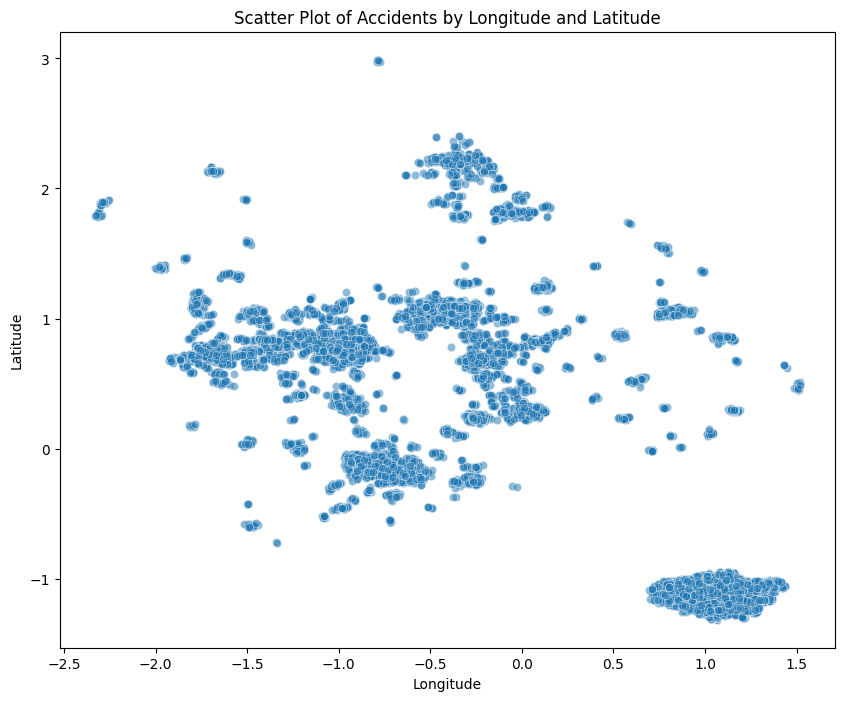

In [391]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Longitude', y='Latitude', data=df, alpha=0.5)
plt.title('Scatter Plot of Accidents by Longitude and Latitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
# This visualization helps to identify areas with high accident concentration and potential spatial patterns.

## Clustering
Apply K-Means clustering. Determine the optimal number of clusters and justify your choice.
* Find the `n_clusters` parameter using the elbow method.
* Train the model.

In [392]:
# Calculate inertia for different values of k
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[selected_features])
    inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

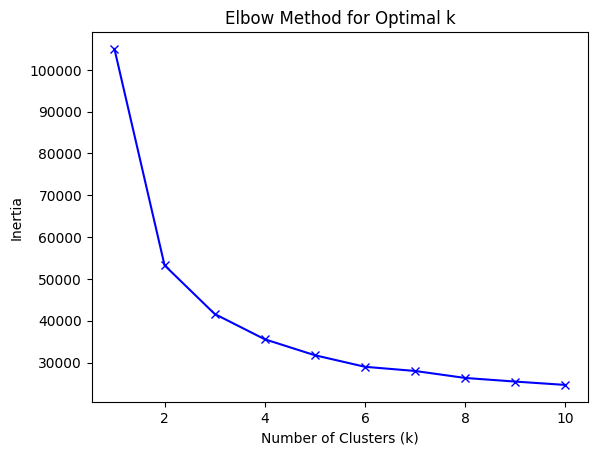

In [393]:
plt.plot(k_range, inertia, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [394]:
# Based on the elbow method, choose the optimal number of clusters
optimal_k = 3  # Adjust based on the elbow point in the graph

In [395]:
# Train the K-Means model
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[selected_features])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


## Evaluation
Evaluate the clustering result using appropriate metrics.


In [ ]:
# Calculate silhouette score
silhouette_avg = silhouette_score(df[selected_features], df['Cluster'])
print("Silhouette Score:", silhouette_avg)

## Plot the data points with their predicted cluster center

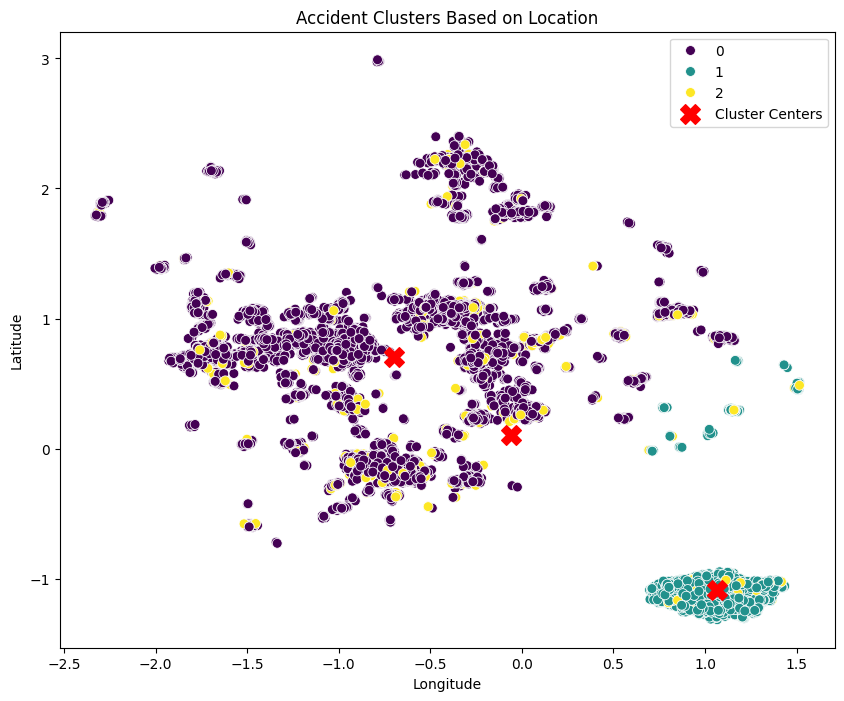

In [397]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Longitude', y='Latitude', hue='Cluster', data=df, palette='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3],
            s=200, c='red', marker='X', label='Cluster Centers')
plt.title('Accident Clusters Based on Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()


## Exam Questions
* **Justify Your Feature Selection:**
   - Which features did you choose for clustering and why?
* **Number of Clusters Choices:**
   - How did you determine the optimal number?
* **Evaluation:**
   - Which metrics did you use to evaluate the clustering results, and why?
   - How do these metrics help in understanding the effectiveness of your clustering approach?
* **Improvements and Recommendations:**
   - Suggest any improvements or future work that could be done with this dataset. What other methods or algorithms would you consider applying?

*   **Justify Your Feature Selection:**
    - The selected features aim to create a comprehensive representation of accident characteristics relevant to geographical clustering.They encompass spatial information, road context, temporal patterns, and environmental factors. This combination allows for a nuanced understanding of accident clusters and their underlying causes.
*   **Number of Clusters Choices:**
    - The optimal number of clusters was determined using the Elbow Method, where it dentifies the point where adding more clusters does not significantly decrease inertia.
*   **Improvements and Recommendations:**
    - No Improvement